

# Objetivo

En este trabajo vamos a analizar los datos epidemiológicos generados por el grupo de trabajo [#escovid19data](https://github.com/montera34/escovid19data). Siguiendo los procesos estándares descargaremos los datos desde gitub, analizaremos los campos y prepararemos una serie de gráficas como ayuda para entender como estñá progresando la enfermedad.


@author: Manuel H. Arias 

@Twitter: @walyt

@mail: mharias@me.com



## Importación de librerias estándares para DAE

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request

import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

## Descargamos la información

Hacemos en primer lugar una actualización de parámetros y preparación de variables que necesitaremos durante el ejercicio

In [2]:
pd.options.display.max_rows = 999 #Variable de contexto para permitir la presentación de datos por pantalla
pd.set_option('display.max_columns', None)

In [3]:
#fuente de pdatos
data_path = '/Users/mharias/documents/proyectos/covid/sanidad_hospital/data/datos_sanidad_hosp.csv'
img_path = '/Users/mharias/documents/proyectos/covid/sanidad_hospital/img/'

In [4]:
hashtag_fuente='#escovid19data' #hashtag de la fuente para los créditos

Leemos los datos en un `pandas`

In [5]:
df = pd.read_csv(data_path)

veamos una rápida descripción de la información:

In [6]:
df.describe()

,Hosp_Totales,UCI_Totales,Hosp_actual,UCI_actual,Ingresos_24horas,Altas_24horas
count,4541.000000,4541.000000,1786.000000,1786.000000,1786.000000,1786.000000
mean,8913.184761,793.283418,941.338186,159.135498,94.964166,93.836506
std,12887.376315,1050.233683,1180.846398,187.039188,123.765631,127.910784
min,10.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,1461.000000,138.000000,191.000000,36.000000,16.000000,14.250000
50%,3775.000000,394.000000,478.000000,84.000000,46.000000,41.500000
75%,9375.000000,806.000000,1119.500000,203.750000,119.000000,116.000000
max,89229.000000,6474.000000,5403.000000,824.000000,684.000000,729.000000


y un muestreo de valores y de algunas columnas de interés:

In [7]:
df.head()

,fecha,ccaa,Hosp_Totales,Hosp_7días,UCI_Totales,UCI_7dias,Hosp_actual,%CamasCovid,UCI_actual,%CamasUCI,Ingresos_24horas,Altas_24horas
0,27/4/2020,Andalucía,5768,20,720,4,NaN,NaN,NaN,NaN,NaN,NaN
1,27/4/2020,Aragón,2403,8,257,0,NaN,NaN,NaN,NaN,NaN,NaN
2,27/4/2020,Asturias,1814,24,137,3,NaN,NaN,NaN,NaN,NaN,NaN
3,27/4/2020,Baleares,1062,0,166,0,NaN,NaN,NaN,NaN,NaN,NaN
4,27/4/2020,Canarias,881,1,171,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.tail()

,fecha,ccaa,Hosp_Totales,Hosp_7días,UCI_Totales,UCI_7dias,Hosp_actual,%CamasCovid,UCI_actual,%CamasUCI,Ingresos_24horas,Altas_24horas
4536,10/3/2021,Melilla,509,13,81,5,13.0,"7,14%",5.0,"29,41%",2.0,2.0
4537,10/3/2021,Murcia,8598,42,1107,8,155.0,"3,75%",57.0,"11,73%",16.0,20.0
4538,10/3/2021,Navarra,5169,27,454,3,71.0,"3,66%",17.0,"12,98%",7.0,4.0
4539,10/3/2021,País Vasco,12811,18,1084,2,472.0,"9,41%",98.0,"22,74%",38.0,55.0
4540,10/3/2021,La Rioja,3220,22,358,2,60.0,"8,30%",20.0,"37,74%",4.0,2.0


In [9]:
def formato_(x):
    if x is np.NaN:
        return x
    else:
        return float(x[:-2].replace(',','.'))
    

In [10]:
df['%CamasUCI'] = df['%CamasUCI'].apply(formato_)
df['%CamasCovid'] = df['%CamasCovid'].apply(formato_)

In [11]:
comunidades = sorted(df['ccaa'].unique())

Vamos a formatear correctamente la columna `Date`, para posteriormente ordenar el $pandas$ por fecha creciente:

In [12]:
df['fecha']=pd.to_datetime(df['fecha'],format='%d/%m/%Y')

In [13]:
df.sort_values(['fecha']).tail()

,fecha,ccaa,Hosp_Totales,Hosp_7días,UCI_Totales,UCI_7dias,Hosp_actual,%CamasCovid,UCI_actual,%CamasUCI,Ingresos_24horas,Altas_24horas
4523,2021-03-10,Aragón,12503,145,1145,19,300.0,7.16,61.0,25.85,28.0,34.0
4522,2021-03-10,Andalucía,39008,372,3949,25,1314.0,7.30,314.0,16.90,143.0,202.0
4539,2021-03-10,País Vasco,12811,18,1084,2,472.0,9.41,98.0,22.74,38.0,55.0
4530,2021-03-10,Cataluña,37388,199,3048,9,2002.0,7.97,501.0,34.50,199.0,217.0
4540,2021-03-10,La Rioja,3220,22,358,2,60.0,8.30,20.0,37.74,4.0,2.0


In [14]:
df.columns

Index(['fecha', 'ccaa', 'Hosp_Totales', 'Hosp_7días', 'UCI_Totales',
       'UCI_7dias', 'Hosp_actual', '%CamasCovid', 'UCI_actual', '%CamasUCI',
       'Ingresos_24horas', 'Altas_24horas'],
      dtype='object')

In [15]:
campos = {'Almería':'daily_cases', 'Cádiz':'daily_cases', 'Córdoba':'daily_cases',
          'Granada':'daily_cases', 'Huelva':'daily_cases', 'Jaén':'daily_cases',
       'Málaga':'daily_cases', 'Sevilla':'daily_cases', 'Huesca':'casos_nuevos_aragon',
          'Teruel':'casos_nuevos_aragon', 'Zaragoza':'casos_nuevos_aragon', 
          'Asturias':'PCR','Balears, Illes':'PCR', 'Palmas, Las':'daily_cases', 
          'Santa Cruz de Tenerife':'daily_cases','Cantabria':'PCR',
          'Albacete':'daily_cases_PCR', 'Ciudad Real':'daily_cases_PCR',
          'Cuenca':'daily_cases_PCR', 'Guadalajara':'daily_cases_PCR',
       'Toledo':'daily_cases_PCR', 'Ávila':'daily_cases_PCR', 'Burgos':'daily_cases_PCR',
          'León':'daily_cases_PCR', 'Palencia':'daily_cases_PCR', 'Salamanca':'daily_cases_PCR',
       'Segovia':'daily_cases_PCR', 'Soria':'daily_cases_PCR', 'Valladolid':'daily_cases_PCR',
          'Zamora':'daily_cases_PCR', 'Barcelona':'daily_cases', 'Girona':'daily_cases',
       'Lleida':'daily_cases', 'Tarragona':'daily_cases', 'Ceuta':'new_cases',
          'Alicante/Alacant':'casos_nuevos_valencia','Castellón/Castelló':'casos_nuevos_valencia',
          'Valencia/València':'casos_nuevos_valencia','Badajoz':'new_cases', 'Cáceres':'new_cases',
       'Coruña, A':'daily_cases', 'Lugo':'daily_cases', 'Ourense':'daily_cases', 
          'Pontevedra':'daily_cases', 'Madrid':'daily_cases_PCR', 'Melilla':'PCR',
       'Murcia':'daily_cases', 'Navarra':'PCR', 'Araba/Álava':'casos_nuevos_paisvasco',
          'Bizkaia':'casos_nuevos_paisvasco', 'Gipuzkoa':'casos_nuevos_paisvasco',
       'Rioja, La':'PCR'}

# Gráficos

 A continuación vamos a crear un gráfico múltiple que nos permita visualizar cada una de las columnas con datos numéricos. Ello nos permitirá

Preparemos un gráfico tipo [Facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), al que añadiremos tantos gráficos como provincias, presentando una de las columnas de datos. Elegimos nº de hospitalizados por 100.000 habitantes. Dejo otras claves con `#` para que fácilmente se puedan generar. Este ejemplo esta basado en el código del link anterior.

In [16]:
df.iloc[1]['fecha'].year

2020

In [17]:
df['fecha']

0      2020-04-27
1      2020-04-27
2      2020-04-27
3      2020-04-27
4      2020-04-27
          ...    
4536   2021-03-10
4537   2021-03-10
4538   2021-03-10
4539   2021-03-10
4540   2021-03-10
Name: fecha, Length: 4541, dtype: datetime64[ns]

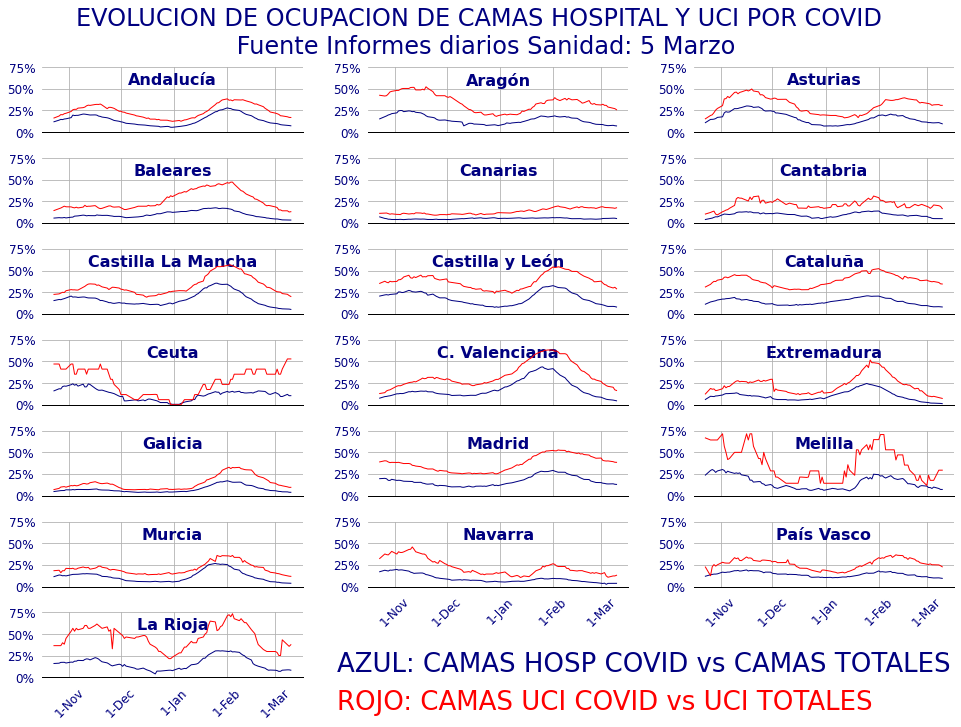

In [18]:
# Creamos la figura desde Matplotlib
#plt.figure()

# Initialize the FacetGrid object
#pal = sns.cubehelix_palette(52, rot=-.25, light=.7)

with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(df,col='ccaa',hue='ccaa',col_wrap=3,aspect=3, 
                      margin_titles=False,height=1.5,sharey=True)

# Título

titulo = 'EVOLUCION DE OCUPACION DE CAMAS HOSPITAL Y UCI POR COVID \n Fuente Informes diarios Sanidad: {}'.format('5 Marzo')
color_titulos = 'navy'
color_uci='red'
color_covid='navy'

#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%-d-%-b')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
def grafica(x, color, label):
    ax1 = plt.gca()
    ax1.xaxis_date()
    df_datos = df.loc[df['ccaa'] == label].sort_values(['fecha'])
   
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    ax1.set_ylim(0,75)
    ax1.set_yticks([0,25,50,75])
    
    ax1.yaxis.set_major_formatter(yticks)
    #ax1.set_yticks([]
    ax1.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_covid)
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.xaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_covid,rotation=45)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    #ax1.set_xticks([])
    ax1.grid(True,axis='both',which='both')
    ax1.plot(df_datos['fecha'], df_datos['%CamasCovid'],lw=1,color=color_covid,label='A')
    
    
    ax2 = ax1.twinx()
    ax2.plot(df_datos['fecha'], df_datos['%CamasUCI'], lw=1, color=color_uci,label='B')
    ax2.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_uci,pad=-10)
    ax2.yaxis.set_major_formatter(yticks)
    #ax2.set_ylim(0,4)
    #ax2.set_yticks([1])
    ax2.xaxis.set_major_formatter(XmajorFmt)
    
    ax2.set_ylim(0,75)
    ax2.set_yticks([0,25,50,75])
    ax2.set_yticks([])
    #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
    ax2.xaxis.set_major_locator(DayLocator([1]))
    #ax2.legend()
    
g.map(grafica,'ccaa')

#plt.legend()
g.set_titles("")
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=False, left=True)
g.fig.suptitle('{}'.format(titulo),fontsize=24,color='navy')
g.fig.text(x=.35,y=.05,s='ROJO: CAMAS UCI COVID vs UCI TOTALES',color='red',fontsize=26)
g.fig.text(x=.35,y=.1,s='AZUL: CAMAS HOSP COVID vs CAMAS TOTALES',color='navy',fontsize=26)

g.fig.subplots_adjust(top=.9,wspace=0.25,hspace=0.4)
#plt.tight_layout()
plt.savefig(img_path+'uci_hosp_comunidades.png',dpi=288)  

plt.show()


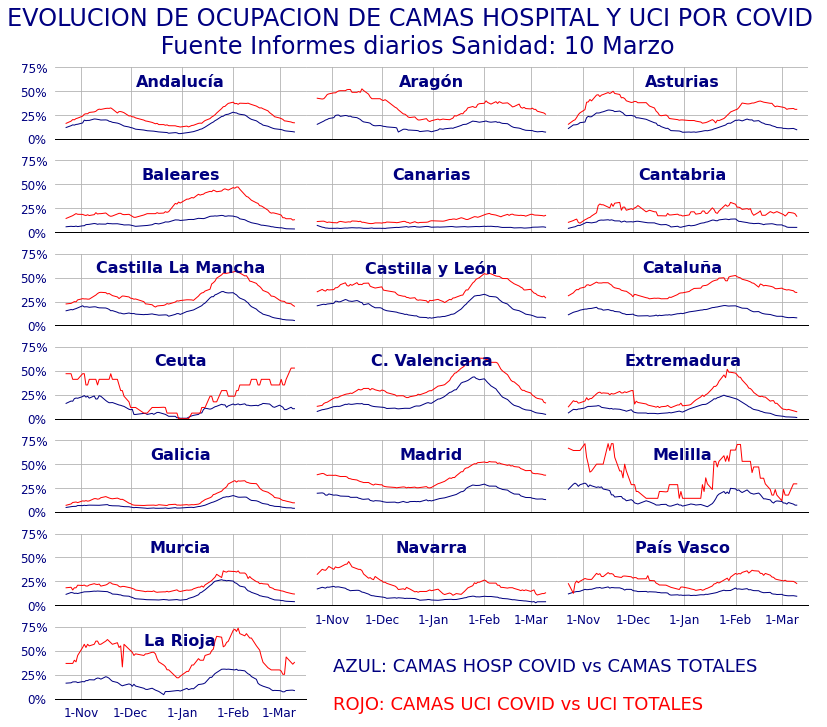

In [21]:
# Creamos la figura desde Matplotlib
#plt.figure()

# Initialize the FacetGrid object
#pal = sns.cubehelix_palette(52, rot=-.25, light=.7)

with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(df,col='ccaa',hue='ccaa',col_wrap=3,aspect=2.5, 
                      margin_titles=False,height=1.5,sharey=True)

# Título

titulo = 'EVOLUCION DE OCUPACION DE CAMAS HOSPITAL Y UCI POR COVID \n Fuente Informes diarios Sanidad: {}'.format('10 Marzo')
color_titulos = 'navy'
color_uci='red'
color_covid='navy'

#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%-d-%-b')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
def grafica(x, color, label):
    ax1 = plt.gca()
    ax1.xaxis_date()
    df_datos = df.loc[df['ccaa'] == label].sort_values(['fecha'])
   
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    ax1.set_ylim(0,75)
    ax1.set_yticks([0,25,50,75])
    
    ax1.yaxis.set_major_formatter(yticks)
    #ax1.set_yticks([]
    ax1.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_covid)
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.xaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_covid,rotation=0)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    #ax1.set_xticks([])
    ax1.grid(True,axis='both',which='both')
    ax1.plot(df_datos['fecha'], df_datos['%CamasCovid'],lw=1,color=color_covid,label='A')
    ax1.plot(df_datos['fecha'], df_datos['%CamasUCI'], lw=1, color=color_uci,label='B')
    ax1.xaxis.set_major_locator(DayLocator([1]))
    #ax2.legend()
    
g.map(grafica,'ccaa')

#plt.legend()
g.set_titles("")
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=False, left=True)
g.fig.suptitle('{}'.format(titulo),fontsize=24,color='navy')
g.fig.text(x=.4,y=.05,s='ROJO: CAMAS UCI COVID vs UCI TOTALES',color='red',fontsize=18)
g.fig.text(x=.4,y=.1,s='AZUL: CAMAS HOSP COVID vs CAMAS TOTALES',color='navy',fontsize=18)

g.fig.subplots_adjust(top=.9,wspace=0.0,hspace=0.3)
#plt.tight_layout()
plt.savefig(img_path+'uci_hosp_comunidades.png',dpi=288)  

plt.show()


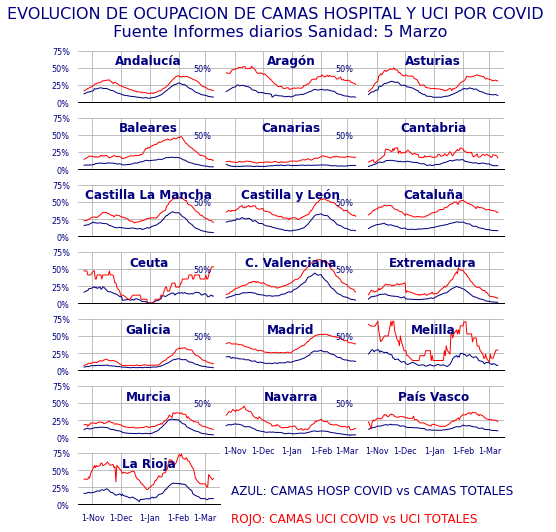

In [20]:
# Creamos la figura desde Matplotlib
#plt.figure()

# Initialize the FacetGrid object
#pal = sns.cubehelix_palette(52, rot=-.25, light=.7)

with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(df,col='ccaa',hue='ccaa',col_wrap=3,aspect=2, 
                      margin_titles=False,height=1.1,sharey=True)

# Título

titulo = 'EVOLUCION DE OCUPACION DE CAMAS HOSPITAL Y UCI POR COVID \n Fuente Informes diarios Sanidad: {}'.format('5 Marzo')
color_titulos = 'navy'
color_uci='red'
color_covid='navy'

#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%-d-%-b')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
def grafica(x, color, label):
    ax1 = plt.gca()
    ax1.xaxis_date()
    df_datos = df.loc[df['ccaa'] == label].sort_values(['fecha'])
   
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=12,transform=ax1.transAxes)
    
    #ax1.set_xticks([])
    ax1.grid(True,axis='both',which='both')
   
    
    
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.xaxis.set_tick_params(labelsize=8,width=0,labelcolor=color_covid,rotation=0)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    ax1.plot(df_datos['fecha'], df_datos['%CamasCovid'],lw=1,color=color_covid,label='A')
    ax1.set_ylim(0,75)
    ax1.set_yticks([0,25,50,75])
    ax1.yaxis.set_tick_params(labelsize=8,width=0,labelcolor=color_covid)
    ax1.yaxis.set_major_formatter(yticks)
    ax1.plot(df_datos['fecha'], df_datos['%CamasUCI'], lw=1, color=color_uci,label='B')
    ax1.xaxis.set_major_locator(DayLocator([1]))
    #ax2.legend()
    
g.map(grafica,'ccaa')

#plt.legend()
g.set_titles("")
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=False, left=True)
g.fig.suptitle('{}'.format(titulo),fontsize=16,color='navy')
g.fig.text(x=.4,y=.05,s='ROJO: CAMAS UCI COVID vs UCI TOTALES',color='red',fontsize=12)
g.fig.text(x=.4,y=.1,s='AZUL: CAMAS HOSP COVID vs CAMAS TOTALES',color='navy',fontsize=12)

g.fig.subplots_adjust(top=.9,wspace=0,hspace=0.3)
#plt.tight_layout()
plt.savefig(img_path+'uci_hosp_comunidades.png',dpi=288)  

plt.show()
